In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from shapely.geometry import Point
import geopandas as gpd

def convert_to_gdf(df):
    if 'geometry' in df.columns:
        gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry='geometry')
        return gdf
    else:
        geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
        gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

    return gdf

# Premise Crowdsourced Surveys

Premise crowdsourced surveys are a way of validating, verifying the ground truth and understanding the needs of people on ground, especially in regions impacted by a crisis

In [3]:
community_needs = pd.read_csv('../../data/premise/community needs/4594606626570240_all.csv')
earthquake_relief = pd.read_csv('../../data/premise/earthquake needs/6384521194504192_all.csv')
hospitals = pd.read_csv('../../data/premise/hospitals/Hospitals_4725901058899968/4725901058899968_all.csv')
roads = pd.read_csv('../../data/premise/roads/Road_Conditions_6644644026515456/6644644026515456_all.csv')
earthquake_damage = pd.read_csv('../../data/premise/export-files-2023-10-09T19_13_18.131Z-ssarva_worldbank.org/Earthquake_Damage_4723695458975744/4723695458975744_all.csv')
fuel_prices = pd.read_csv('../../data/premise/export-files-2023-10-09T19_13_42.552Z-ssarva_worldbank.org/Fuel_Prices_and_Availability_5766686195843072/5766686195843072_all.csv')

In [4]:
morocco_adm2 = gpd.read_file('../../data/shapefiles/gadm41_MAR_shp/gadm41_MAR_2.shp')
morocco_adm3 = gpd.read_file('../../data/shapefiles/gadm41_MAR_shp/gadm41_MAR_3.shp')
morocco_adm4= gpd.read_file('../../data/shapefiles/gadm41_MAR_shp/gadm41_MAR_4.shp')

In [5]:
earthquake_intensity = gpd.read_file('../../data/earthquake/shape/mi.shp')
ei_adm4 = morocco_adm4[['NAME_4','NAME_3','NAME_2','NAME_1','geometry']].sjoin(earthquake_intensity[['PARAMVALUE', 'geometry']])

In [6]:
standard_coi = ['gender', 'age', 'geography', 'financial_situation', 'education',
       'employment_status','observation_lat', 'observation_lon', 'geometry']
community_needs_coi = ['in_your_neighborhood_is_lack_of_access_to_safe_drinking_or_cooking_water_a_severe_problem', 'in_your_neighborhood_is_lack_of_access_to_personal_hygiene_products_and_services_a_severe_problem', 'have_there_been_significant_changes_in_the_availability_of_food_in_your_neighborhood_after_the_earthquake'
                       ,'in_your_neighborhood_is_lack_of_access_to_medical_attention_a_severe_problem', 'in_your_neighborhood_is_lack_of_income_money_or_resources_to_survive_the_earthquake_s_aftermath_a_problem', 'in_your_neighborhood_is_there_a_severe_problem_related_to_nutrition']

## Community Needs Survey

In [7]:
df = community_needs
geometry = [Point(xy) for xy in zip(df.observation_lon, df.observation_lat)]
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

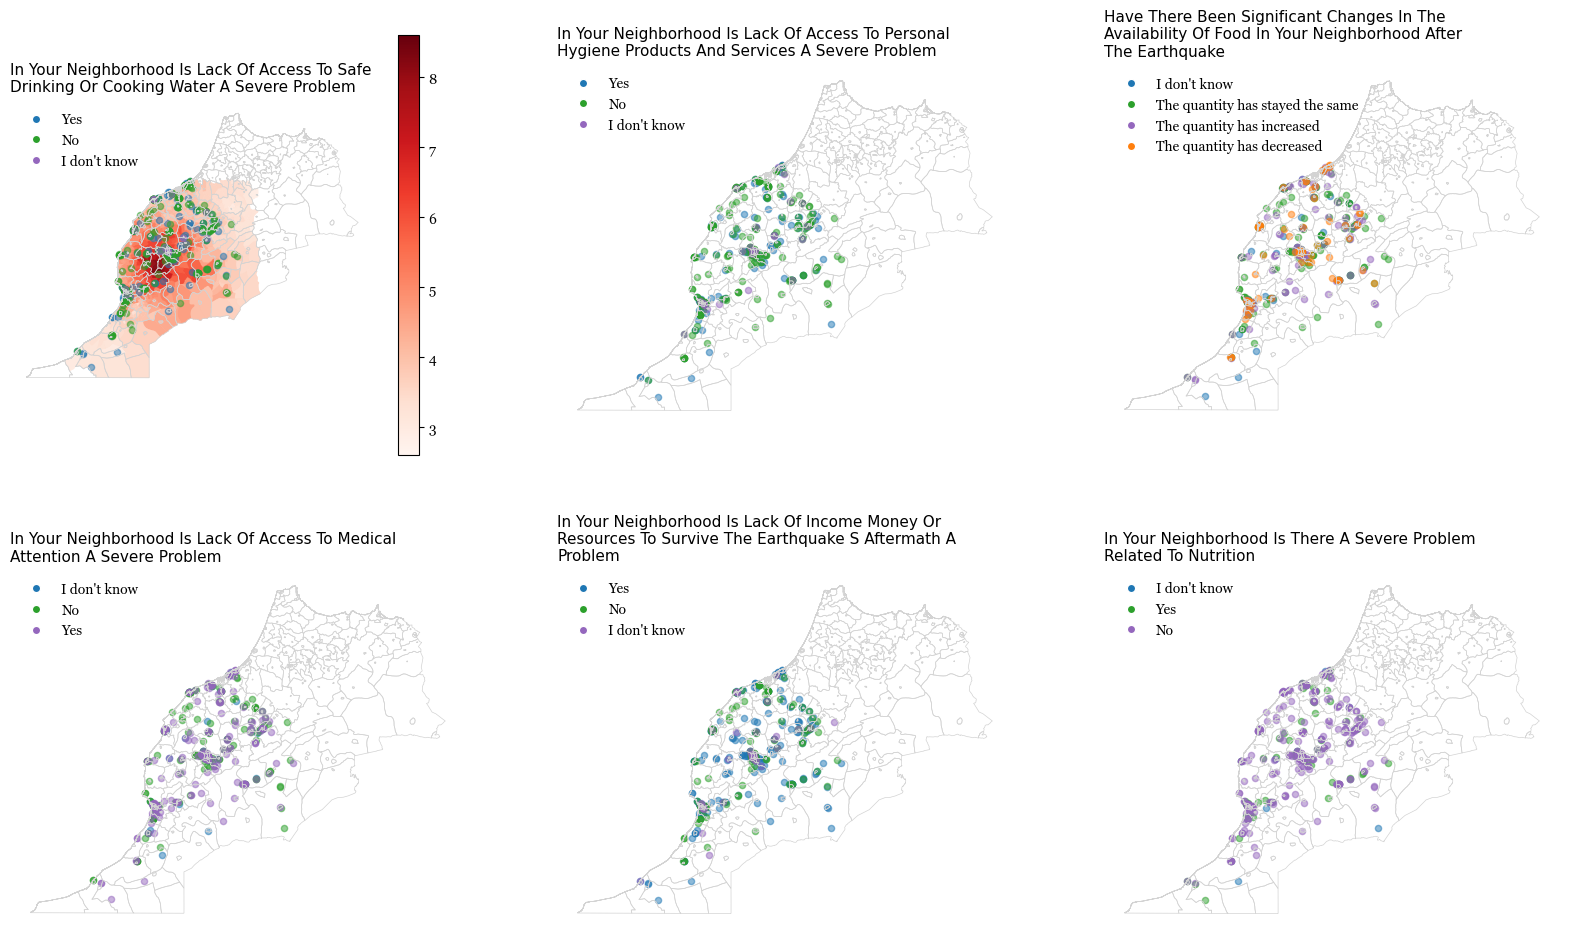

In [8]:
import textwrap
from matplotlib.lines import Line2D

fig, axs = plt.subplots(2,3,figsize=(20,12))
ax = axs.flatten()
plt.rcParams["font.family"] = "Georgia"

ei_adm4.plot(column='PARAMVALUE', cmap = 'Reds', ax=ax[0], legend = True, alpha = 0.5)

for idx, column in enumerate(community_needs_coi):

    response_list = list(gdf[column].unique())
    morocco_adm3.boundary.plot(ax=ax[idx], edgecolor = '#D3D3D3', linewidth=0.5)

    unique_values = gdf[column].unique()

    custom_colors = ['#1f77b4', '#2ca02c', '#9467bd', '#ff7f0e']

    color_dict = {value: custom_colors[i % len(custom_colors)] for i, value in enumerate(unique_values)}

    for value in unique_values:
        # Create a separate plot for each unique value
        subset = gdf[gdf[column] == value]
        subset.plot(ax=ax[idx], alpha=0.5, label=value, legend=True, marker='o', markersize=20, color=color_dict[value])

    #gdf[standard_coi+community_needs_coi].plot(ax=ax[idx], column = column, legend = True, cmap='viridis')


    title = column.replace('_', ' ').title()
    wrapped_title = '\n'.join(textwrap.wrap(title, width=50))

    ax[idx].set_title(wrapped_title, loc = 'left', fontsize = 11)

    # print(gdf[column].unique())
    legend_labels = list(gdf[column].unique())
    handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color_dict[label]) for label in legend_labels]
    ax[idx].legend(handles=handles, loc='upper left',  frameon=False)


    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['bottom'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].spines['left'].set_visible(False)

    ax[idx].set_xticks([])
    ax[idx].set_yticks([])

plt.show()

### Observations:

- There seems to be few responses that report lack of nutrition, but a lot more that report shortage of money and medical services.  
- Google Trends data can be used to identfy need for 'Water', 'Drinking Water'

In [18]:
earthquake_damage_coi = ['which_of_the_following_best_describes_the_level_of_damage_to_the_area', 'how_many_businesses_and_restaurants_are_operating_normally_after_the_earthquake', 'how_many_businesses_and_restaurants_are_operating_normally_after_the_earthquake']
earthquake_relief_coi = ['have_you_been_personally_effected_by_the_earthquake','how_do_you_rate_the_response_of_morocco_s_national_government_agencies',
       'how_do_you_rate_the_response_of_morocco_s_local_government_agencies']
hospitals_coi = ['how_safe_do_you_feel_in_this_area?']
fuel_coi = ['is_fuel_currently_available_for_sale_at_this_location'] 
fuel_prices = ['what_is_the_price_of_a_liter_of_petrol', 'what_is_the_price_of_a_liter_of_diesel']

## Earthquake Damage 

In [10]:
df = earthquake_damage
geometry = [Point(xy) for xy in zip(df.observation_lon, df.observation_lat)]
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

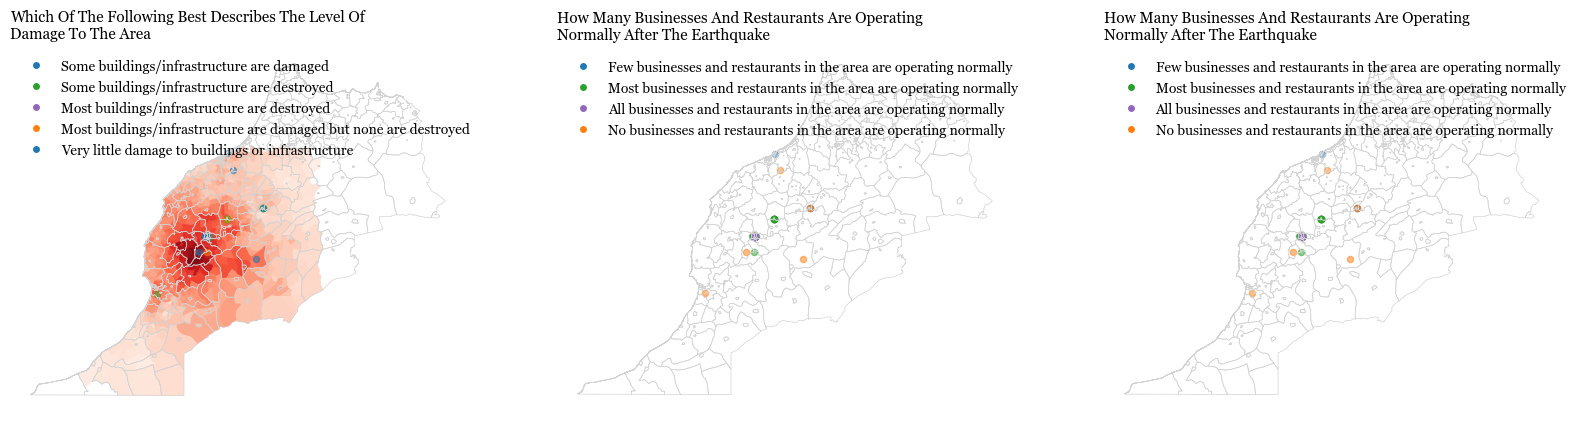

In [11]:
import textwrap
from matplotlib.lines import Line2D

fig, axs = plt.subplots(1,3,figsize=(20,12))
ax = axs.flatten()
plt.rcParams["font.family"] = "Georgia"

ei_adm4.plot(column='PARAMVALUE', cmap = 'Reds', ax=ax[0],alpha = 0.5)

for idx, column in enumerate(earthquake_damage_coi):

    morocco_adm3.boundary.plot(ax=ax[idx], edgecolor = '#D3D3D3', linewidth=0.5)

    df = gdf.dropna(subset=column)

    unique_values = df[column].unique()

    custom_colors = ['#1f77b4', '#2ca02c', '#9467bd', '#ff7f0e']

    color_dict = {value: custom_colors[i % len(custom_colors)] for i, value in enumerate(unique_values)}

    for value in unique_values:
        # Create a separate plot for each unique value
        subset = df[df[column] == value]
        subset.plot(ax=ax[idx], alpha=0.5, label=value, legend=True, marker='o', markersize=20, color=color_dict[value])

    #gdf[standard_coi+community_needs_coi].plot(ax=ax[idx], column = column, legend = True, cmap='viridis')


    title = column.replace('_', ' ').title()
    wrapped_title = '\n'.join(textwrap.wrap(title, width=50))

    ax[idx].set_title(wrapped_title, loc = 'left', fontsize = 11)

    # print(gdf[column].unique())
    legend_labels = list(df[column].unique())
    handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color_dict[label]) for label in legend_labels]
    ax[idx].legend(handles=handles, loc='upper left',  frameon=False)


    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['bottom'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].spines['left'].set_visible(False)

    ax[idx].set_xticks([])
    ax[idx].set_yticks([])

plt.show()

## Earthquake Relief

In [12]:
df = earthquake_relief
geometry = [Point(xy) for xy in zip(df.observation_lon, df.observation_lat)]
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

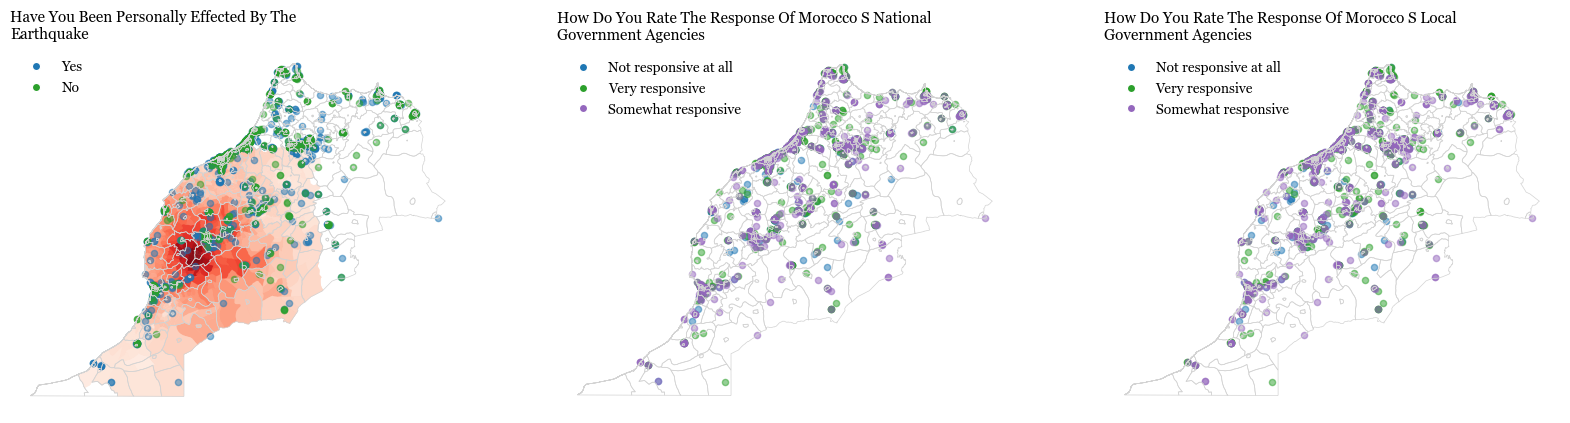

In [13]:
import textwrap
from matplotlib.lines import Line2D

fig, axs = plt.subplots(1,3,figsize=(20,12))
ax = axs#.flatten()
plt.rcParams["font.family"] = "Georgia"

ei_adm4.plot(column='PARAMVALUE', cmap = 'Reds', ax=ax[0],alpha = 0.5)

for idx, column in enumerate(earthquake_relief_coi):

    morocco_adm3.boundary.plot(ax=ax[idx], edgecolor = '#D3D3D3', linewidth=0.5)

    df = gdf.dropna(subset=column)

    unique_values = df[column].unique()

    custom_colors = ['#1f77b4', '#2ca02c', '#9467bd', '#ff7f0e']

    color_dict = {value: custom_colors[i % len(custom_colors)] for i, value in enumerate(unique_values)}

    for value in unique_values:
        # Create a separate plot for each unique value
        subset = df[df[column] == value]
        subset.plot(ax=ax[idx], alpha=0.5, label=value, legend=True, marker='o', markersize=20, color=color_dict[value])

    #gdf[standard_coi+community_needs_coi].plot(ax=ax[idx], column = column, legend = True, cmap='viridis')


    title = column.replace('_', ' ').title()
    wrapped_title = '\n'.join(textwrap.wrap(title, width=50))

    ax[idx].set_title(wrapped_title, loc = 'left', fontsize = 11)

    # print(gdf[column].unique())
    legend_labels = list(df[column].unique())
    handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color_dict[label]) for label in legend_labels]
    ax[idx].legend(handles=handles, loc='upper left',  frameon=False)


    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['bottom'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].spines['left'].set_visible(False)

    ax[idx].set_xticks([])
    ax[idx].set_yticks([])

plt.show()

## Fuel Prices

In [14]:
df = fuel_prices
geometry = [Point(xy) for xy in zip(df.observation_lon, df.observation_lat)]
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

In [15]:
gdf['what_is_the_price_of_a_liter_of_petrol'] = gdf['what_is_the_price_of_a_liter_of_petrol'].astype(float)
gdf['what_is_the_price_of_a_liter_of_diesel'] = gdf['what_is_the_price_of_a_liter_of_diesel'].astype(float)